# Image Classification with Object Based Image Analysis (OBIA) 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rasterio as rio
import geopandas
import skimage

from skimage import util
from skimage.segmentation import mark_boundaries, slic
from tqdm import tqdm

In [81]:
def stretch_histogram(band, min_out=0, max_out=255):
    min_in, max_in = np.percentile(band, (2, 98))  # Considerando 2% - 98% para evitar outliers
    stretched = (band - min_in) * ((max_out - min_out) / (max_in - min_in)) + min_out
    stretched = np.clip(stretched, min_out, max_out)
    return stretched / 255

In [82]:
#Set image path
image = './images/Crops_USA.tif'
#Open image
with rio.open(image) as f:
    img = f.read([1,2,3,4]).astype(float) /255 #Normalizing Image
    red, green, blue, nir = img

In [98]:
rgb = np.stack([red, green, blue], axis=-1)
ndvi = (red - nir) / (nir + red + 1e-10)
ndwi = (green - nir) / (green + nir + 1e-10)

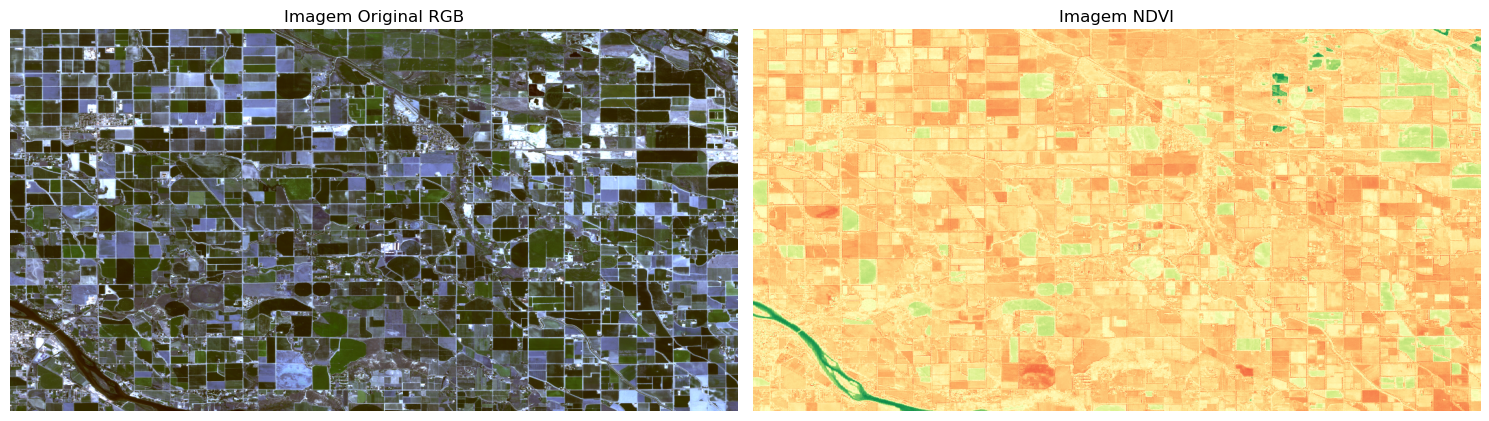

In [90]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize = (15,18))

#Plotting the RGB
ax[0].imshow(stretch_histogram(rgb))
ax[0].set_title('Imagem Original RGB')
ax[0].axis('off')

ax[1].imshow(ndvi, cmap="RdYlGn")
ax[1].set_title('Imagem NDVI')
ax[1].axis('off')

plt.tight_layout()
plt.show()

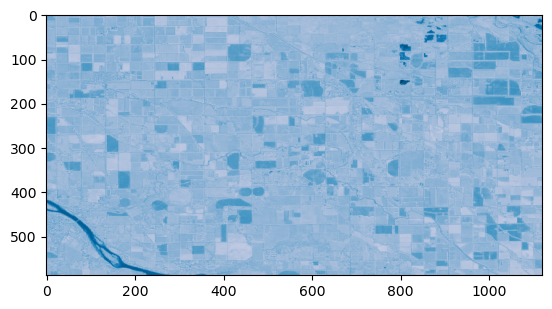

In [100]:
plt.imshow(ndwi, cmap="PuBu");

In [97]:
#
thresholds = [-0.5, -0.25, 0, 0.25, 0.5]

(-0.5408936702810315, -0.10716127482483757, 0.5437919743340198)